In [2]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

tf = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

train_dl = DataLoader(
    datasets.ImageFolder('data/Training', tf),
    batch_size=32, shuffle=True, num_workers=4, pin_memory=True
)

test_dl = DataLoader(
    datasets.ImageFolder('data/Testing', tf),
    batch_size=32, shuffle=False, num_workers=4, pin_memory=True
)

In [3]:
model = nn.Sequential(
    nn.Conv2d(3, 32, 3, 1, 1), nn.ReLU(), nn.MaxPool2d(2),
    nn.Conv2d(32, 64, 3, 1, 1), nn.ReLU(), nn.MaxPool2d(2),
    nn.Conv2d(64, 128, 3, 1, 1), nn.ReLU(), nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(128 * 16 * 16, 256), nn.ReLU(), nn.Dropout(0.5),
    nn.Linear(256, 4) # 4 Classes
).to(device)

In [4]:
opt = optim.AdamW(model.parameters(), 1e-4)
loss_fn = nn.CrossEntropyLoss()

In [5]:
model.train()

for epoch in range(25):
    running_loss = 0

    for x, y in train_dl:
        opt.zero_grad()

        loss = loss_fn(model(x.to(device)), y.to(device))
        loss.backward()

        running_loss += loss

        opt.step()

    print(f'Epoch {epoch+1}: Loss was {running_loss}')

C:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch 1: Loss was 150.95872497558594
Epoch 2: Loss was 102.06971740722656
Epoch 3: Loss was 87.10269927978516
Epoch 4: Loss was 74.49250793457031
Epoch 5: Loss was 65.70558166503906
Epoch 6: Loss was 59.0402946472168
Epoch 7: Loss was 52.809627532958984
Epoch 8: Loss was 49.732242584228516
Epoch 9: Loss was 43.17470932006836
Epoch 10: Loss was 40.36415100097656
Epoch 11: Loss was 35.05187225341797
Epoch 12: Loss was 32.046165466308594
Epoch 13: Loss was 30.370180130004883
Epoch 14: Loss was 26.65679931640625
Epoch 15: Loss was 25.42770004272461
Epoch 16: Loss was 23.132413864135742
Epoch 17: Loss was 20.654563903808594
Epoch 18: Loss was 18.74774169921875
Epoch 19: Loss was 18.547285079956055
Epoch 20: Loss was 15.403509140014648
Epoch 21: Loss was 14.114141464233398
Epoch 22: Loss was 14.24394416809082
Epoch 23: Loss was 13.612611770629883
Epoch 24: Loss was 12.290582656860352
Epoch 25: Loss was 10.674851417541504


In [7]:
model.eval()
test_loss, correct = 0.0, 0

with torch.no_grad():
    for x, y in test_dl:
        x, y = x.to(device), y.to(device)

        logits = model(x)
        test_loss += loss_fn(logits, y).item() * y.size(0)

        preds = logits.argmax(dim=1)
        correct += (preds == y).sum().item()

test_loss /= len(test_dl.dataset)
accuracy = 100.0 * correct / len(test_dl.dataset)

print('Test Loss: ', test_loss, 'Test accuracy: ', accuracy, '%')

C:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Test Loss:  0.16635527502310543 Test accuracy:  95.4233409610984 %


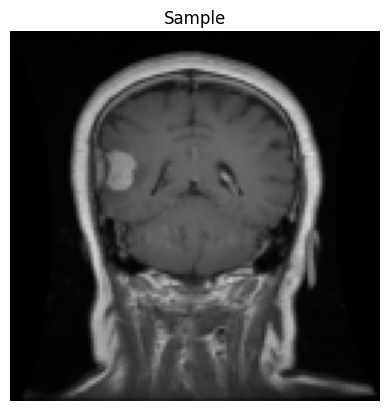

Predicted class: meningioma
Ground-truth: meningioma


In [13]:
import random

import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

model.eval()

idx = random.randrange(len(test_dl.dataset))
img, label = test_dl.dataset[idx]

unnorm = img * 0.5 + 0.5
plt.imshow(to_pil_image(unnorm))
plt.axis('off')
plt.title('Sample')
plt.show()

with torch.no_grad():
    logits = model(img.unsqueeze(0).to(device))
    pred = logits.argmax(1).item()

class_names = test_dl.dataset.classes
print(f'Predicted class: {class_names[pred]}')
print(f'Ground-truth: {class_names[label]}')